In [10]:
# answer 1

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pandas as pd

# Load penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Function to add lines and rectangles to the plot
def add_markers(fig, data, species_name):
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    min_val = data.min()
    max_val = data.max()
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2), annotation_text=f'Mean {species_name}', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color='green', width=2), annotation_text=f'Median {species_name}', annotation_position='top right')
    
    # Add rectangles for range, interquartile range, and two standard deviations
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="lightgray", opacity=0.2, annotation_text=f'Range {species_name}', annotation_position="bottom left")

    # Interquartile range (25th to 75th percentile)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.3, annotation_text=f'IQR {species_name}', annotation_position="bottom right")
    
    # Two standard deviations from mean
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, line_width=0, fillcolor="red", opacity=0.2, annotation_text=f'2 Std Dev {species_name}', annotation_position="top right")

# Create histograms for each species and add lines/rectangles
fig = go.Figure()

# Get unique species
species_list = penguins['species'].unique()

for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Add a histogram for each species
    fig.add_trace(go.Histogram(x=species_data, name=species, opacity=0.7))
    
    # Add location and scale markers
    add_markers(fig, species_data, species)

# Update layout
fig.update_layout(barmode='overlay', title="Flipper Length with Mean, Median, and Scale Indicators for Each Penguin Species", xaxis_title="Flipper Length (mm)", yaxis_title="Count")

# Show plot
fig.show()


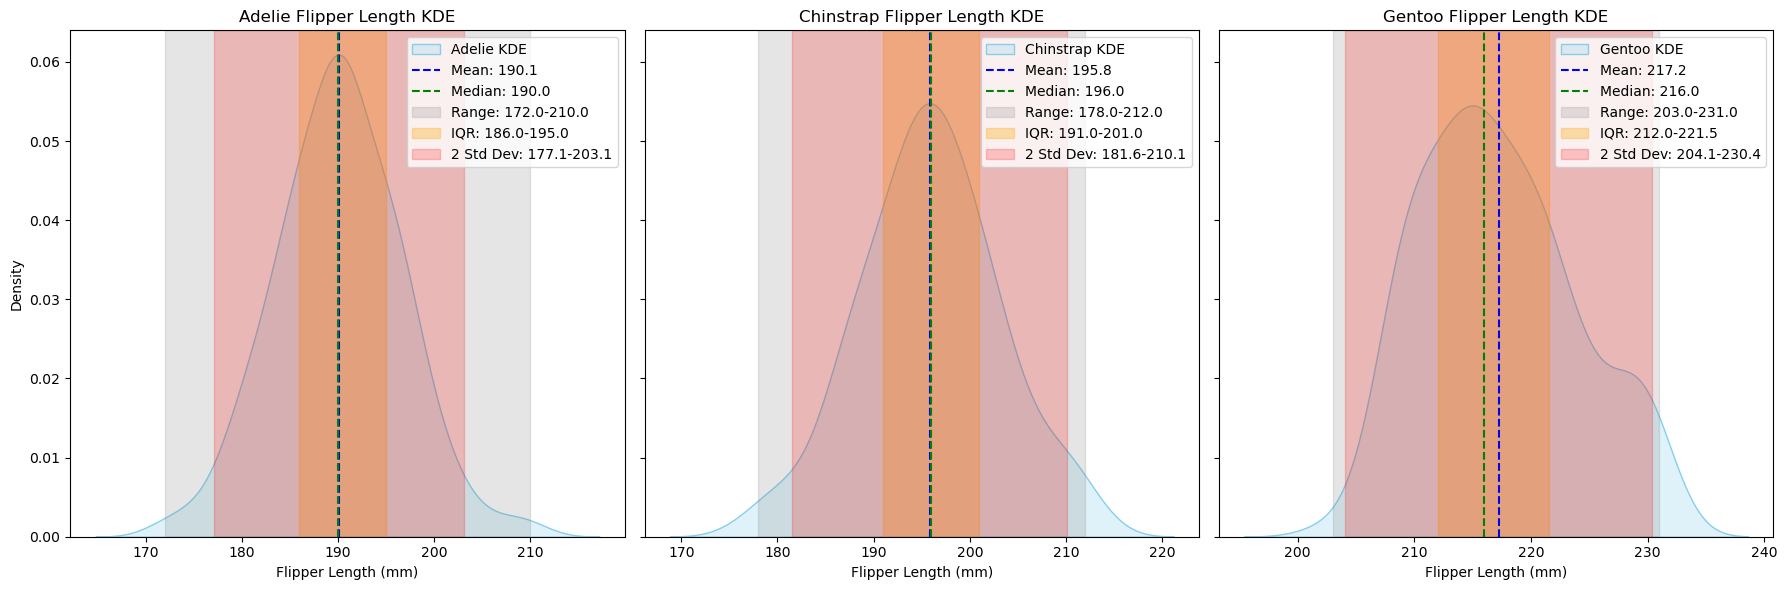

In [3]:
# answer 2

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Create a function to plot KDE with markers
def plot_kde_with_markers(ax, data, species_name):
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    min_val = data.min()
    max_val = data.max()

    # Plot KDE
    sns.kdeplot(data, ax=ax, fill=True, label=f'{species_name} KDE', color='skyblue')

    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.1f}')
    ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
    
    # Add rectangles for range, interquartile range, and two standard deviations
    # Range (min to max)
    ax.axvspan(min_val, max_val, color='gray', alpha=0.2, label=f'Range: {min_val}-{max_val}')
    
    # Interquartile range (25th to 75th percentile)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    ax.axvspan(q1, q3, color='orange', alpha=0.3, label=f'IQR: {q1:.1f}-{q3:.1f}')
    
    # Two standard deviations from mean
    ax.axvspan(mean - 2*std, mean + 2*std, color='red', alpha=0.2, label=f'2 Std Dev: {mean-2*std:.1f}-{mean+2*std:.1f}')
    
    # Add labels and title
    ax.set_title(f'{species_name} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

    # Display the legend
    ax.legend()

# Create the figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get unique species
species_list = penguins['species'].unique()

# Loop over species to create individual KDE plots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    plot_kde_with_markers(axes[i], species_data, species)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# answer 3

1. Box Plots: These are compact, non-parametric visualizations that summarize data by displaying key statistics such as the median, quartiles, and potential outliers. They are highly useful for comparing distributions across groups and for detecting skewness and extreme values, but they don't provide detailed information about the shape of the distribution.

Pros: Easy comparison between groups; highlights outliers; compact.
Cons: Lacks detail on distribution shape; limited use for small data sets.

2. Histograms: These provide a detailed, bin-based view of the data’s distribution, allowing you to see the frequency of data points in each bin. However, they are sensitive to bin width and cutoff choices, which can significantly alter the visual interpretation of the data​(

Pros: Shows the actual distribution of data; useful for large datasets.
Cons: Choice of bin width can distort patterns; less compact than box plots.

3. Kernel Density Estimators (KDE): KDEs are smooth, continuous visualizations that estimate the probability density function of the data. Unlike histograms, KDEs don't rely on binning, instead using a bandwidth parameter to control the smoothness of the curve. This makes them more flexible and capable of revealing underlying trends, but the choice of bandwidth can affect the interpretation of the data​(

Pros: Smoother, more continuous representation of data; less sensitive to arbitrary bin choices.
Cons: Bandwidth choice impacts interpretation; may smooth out important features.

4. Preference and Rationale:
I prefer KDE plots because they provide a smooth, continuous estimate of the data distribution without the artifacts introduced by binning (as seen in histograms). While they require careful bandwidth selection, KDEs offer a more intuitive visualization of underlying patterns, making them especially useful for identifying subtle trends and clusters. However, if I were comparing several groups, I might favor box plots for their simplicity and ease of comparison.








In [2]:
# answer 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and Mark



Datasets Summary:

1. Means:

Dataset A (Uniform): Mean ≈ 5.02

Dataset B (Normal): Mean ≈ 4.95

Dataset C (Mixture): Mean ≈ 4.98

Dataset D (Normal): Mean ≈ 6.00

2. Variances:

Dataset A: Variance ≈ 8.17

Dataset B: Variance ≈ 2.22

Dataset C: Variance ≈ 9.13

Dataset D: Variance ≈ 0.25

Analysis of Relationships:

1. Similar Means and Similar Variances:

None of the datasets show both similar means and similar variances.

2. Similar Means but Quite Different Variances:

Datasets A, B, and C have similar means (approximately 5):

Means: A (5.02), B (4.95), C (4.98)

However, their variances differ significantly:

Variances: A (8.17), B (2.22), C (9.13)

3. Similar Variances but Quite Different Means:

None of the datasets exhibit similar variances while having quite different means.

4. Quite Different Means and Quite Different Variances:

Datasets B and D have notably different means and variances:

B: Mean (4.95), Variance (2.22)

D: Mean (6.00), Variance (0.25)

5. Summary:
Similar Means and Similar Variances: None

Similar Means but Quite Different Variances: A, B, C

Similar Variances but Quite Different Means: None

Quite Different Means and Quite Different Variances: B, D


# answer 5

The mean and median are measures of central tendency, each providing a different perspective on the data set. The skewness of a distribution indicates its asymmetry, which affects the relationship between the mean and median.

Key Concepts:

1. Mean: The arithmetic average of a data set, sensitive to extreme values (outliers).

2. Median: The middle value of a data set when it is ordered, less sensitive to outliers.

3. Skewness:

Right Skewness (Positive Skewness): The tail on the right side of the distribution is longer or fatter than the left. In such cases, the mean is typically greater than the median.

Left Skewness (Negative Skewness): The tail on the left side is longer or fatter than the right. Here, the mean is usually less than the median.

Why This Relationship Exists:

In right-skewed distributions, the presence of large values pulls the mean to the right, whereas the median, being the midpoint, remains less affected.

Conversely, in left-skewed distributions, smaller values pull the mean to the left while the median remains closer to the bulk of the data.

In [3]:
# answer 6

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
# answer 7

import pandas as pd
import plotly.express as px

# Load the Gapminder dataset
url = "https://raw.githubusercontent.com/Gapminder/gapminder/master/gapminderDataFiveYear.csv"
df = pd.read_csv(url)

# Create the animated scatter plot
fig = px.scatter(
    df,
    x="gdpPercap",                 # GDP per capita
    y="lifeExp",                   # Life Expectancy
    animation_frame="year",        # Animation by year
    animation_group="country",     # Grouping by country
    size="pop",                    # Size by population
    color="continent",             # Color by continent
    hover_name="country",          # Hover text
    log_x=True,                   # Log scale for GDP
    range_x=[100, 100000],        # Range for x-axis
    range_y=[25, 85],             # Range for y-axis
    title="Gapminder: Life Expectancy vs GDP per Capita",
    labels={"gdpPercap": "GDP per Capita", "lifeExp": "Life Expectancy"}
)

# Show the figure
fig.show(renderer="png")



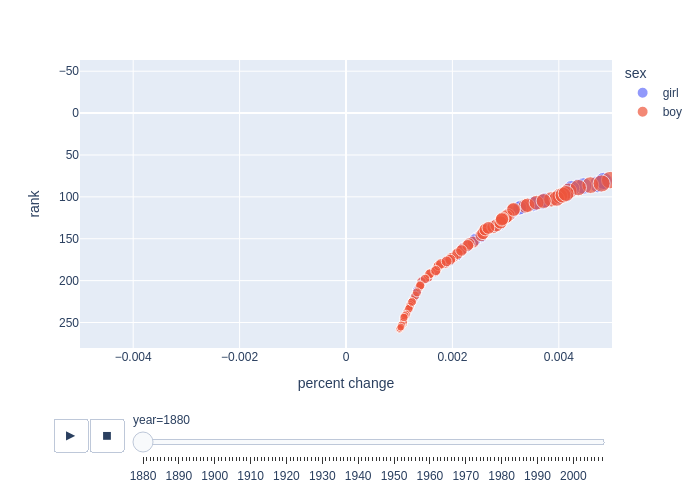

In [9]:
# answer 8

import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Create rank and percent change
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the animated scatter plot
fig = px.scatter(
    bn,
    x="percent change",            # x-axis: percent change
    y="rank",                      # y-axis: rank
    animation_frame="year",        # Animation by year
    animation_group="name",        # Grouping by name
    size="percent",                # Size by percent
    color="sex",                   # Color by sex
    hover_name="name",             # Hover text
    size_max=50,                  # Maximum size of points
    range_x=[-0.005, 0.005]       # Range for x-axis
)

# Update y-axis to reverse the order for rank
fig.update_yaxes(autorange='reversed') 

# Show the figure
fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


# answer 9

Yes 